# HEADER


---



## Docs

> * [Wikipedia: accuracy and precision](https://en.wikipedia.org/wiki/Accuracy_and_precision)

> * [Cross-entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)


> * [machinelearningmastery MNIST fashion neural network classification](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/)

> * [fashion-mnist Github resources](https://github.com/zalandoresearch/fashion-mnist)

## Dataset `Fashion-MNIST`


---



***Summary:***

 = = = = = = =

**Context**

> The goal is to build a model for a classification predictive problem: to classify a fashion clothe given its 28x28px grayscale image into a well-defined output class (trouser, dress, coat...)

> After transforming output class (a vector of scalars) into a binary matrix, we will face a **multi-class classification**.

**Content**

> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

> We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

**Loading data with Python**
>```python
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('data/fashion', kind='train')
testX, testy = mnist_reader.load_mnist('data/fashion', kind='t10k')
```

**Loading data with Tensorflow**
> Make sure you have downloaded the data and placed it in data/fashion. Otherwise, Tensorflow will download and use the original MNIST. 
>```python
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion')
data.train.next_batch(BATCH_SIZE)
```
>```python
data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
```
>```python
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
```




### Target Class Labels

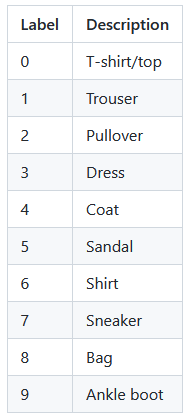

## Update Scikit-Learn package

In [1]:
# !pip install --upgrade scikit-learn
# !pip install scikeras

## Libraries

In [2]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
"""
# Data structures
import numpy as np
import pandas as pd

# Algorithms and Estimators
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Scikit-Learn example datasets
from sklearn.datasets import load_breast_cancer

# Scikit-Learn Utilities
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Scikit-Lean Estimators
from scikeras.wrappers import KerasClassifier

# Scikit-Learn Accuracy Metrics
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Keras parameters
# from keras.metrics import BinaryAccuracy, BinaryCrossentropy, Accuracy
# from keras.initializers import HeNormal, GlorotNormal
# from keras.losses import BinaryCrossentropy, CategoricalCrossentropy
# from keras.activations import sigmoid, softmax, relu
from keras.optimizers import Adam

# Scikit-Learn Metrics-Display
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Others
from statistics import mean
"""

'\n# Data structures\nimport numpy as np\nimport pandas as pd\n\n# Algorithms and Estimators\nfrom sklearn import svm\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten\n\n# Scikit-Learn example datasets\nfrom sklearn.datasets import load_breast_cancer\n\n# Scikit-Learn Utilities\nfrom sklearn.model_selection import train_test_split\nfrom keras.callbacks import LearningRateScheduler\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n\n# Scikit-Lean Estimators\nfrom scikeras.wrappers import KerasClassifier\n\n# Scikit-Learn Accuracy Metrics\nfrom sklearn.metrics import accuracy_score, precision_score \nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import f1_score\nfrom sklearn.metrics import log_loss\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\n\n# Keras parameters\n# from keras.metrics import

# LOAD DATASET


---



## Import data

In [4]:
from keras.datasets import fashion_mnist

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Splitting dataset into training and test data

In [5]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Shape of a simple image

In [6]:
trainX[:1].shape

(1, 28, 28)

## Displaying dataset information

### Dataset class labels

In [7]:
class_names = ['T_shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat', 
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

### Show nine dataset images

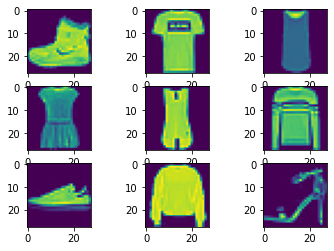

In [8]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # Print grayscale photographs 
    # plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    # plot raw pixel data with its original colour
    plt.imshow(trainX[i])
    # show the figure
plt.show()

### Show one dataset image

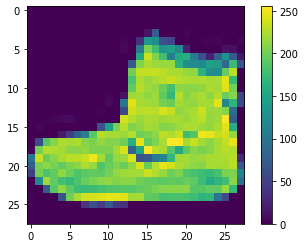

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Show twelve dataset images

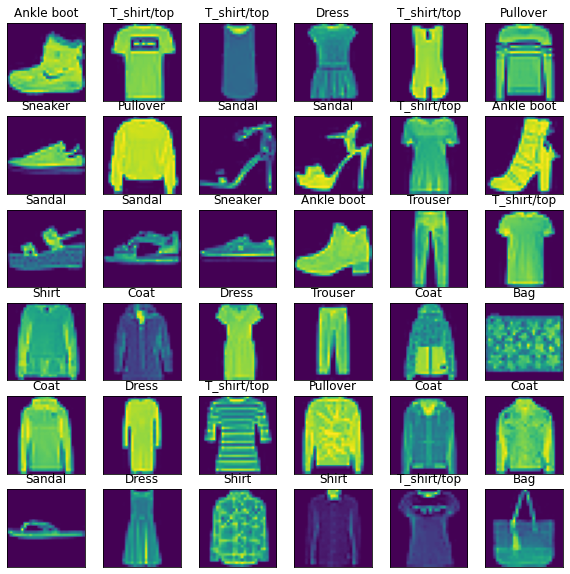

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i].reshape((28,28)))
    label_index = int(trainy[i])
    plt.title(class_names[label_index])
plt.show()

### Show 256 dataset images

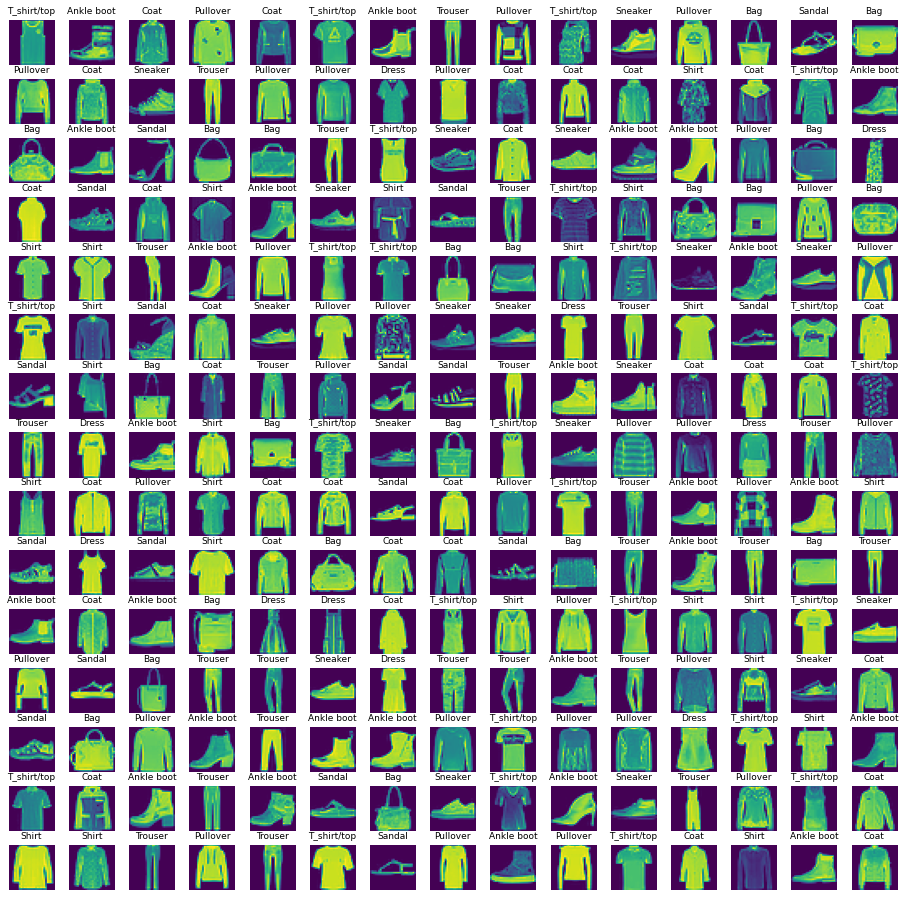

In [11]:
import matplotlib.pyplot as plt

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(trainX) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( trainX[index].reshape((28,28)) )
    labelindex = int(trainy[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# PREPARATION of DATASET

### Reshape dataset to have a single channel

In [12]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

### Turning categorical attributes on numeric codes

Docs: 
> * [Transforming the prediction target](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

> * [Transforming target in regression](https://scikit-learn.org/stable/modules/compose.html#transformed-target-regressor)

There is four ways for transforming labels:

1. First
> * Simplest method. Encode labels with value between 0 and `n_classes-1`
> * ***Transformer that are not intended to be used on features, only on supervised learning targets.***
> * [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

1. Second
`One-of-K`, also known as `one-hot` or `dummy encoding`:
> * [One Hot Encoding function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html)

1. Third.
Transforming lists of feature-value mappings to vectors.
> * [Dict Vectorizer]()

1. Fourth (ONLY FOR KERAS NEURAL NETWORKS)
Keras Utils `To_categorical` function
> * [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)
```python
from keras.utils import to_categorical
""" one hot encode target values"""
trainY = to_categorical(trainY)
```

As target outputs (testy and trainy) are categorical variables we should transform them into numeric values.

Among all techniques available, we choose Keras `to_categorical()` function because its straightforwardness. `LabelEncoder()` would also be a good choice.

In [13]:
from keras.utils import to_categorical
# one hot encode target values
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [14]:
trainy[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
testy[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Scaling Data


---

> We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

> We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

> A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value

In [16]:
"""
# Min Max Scaler Technique
from sklearn.preprocessing import MinMaxScaler

try:
    scaler = MinMaxScaler()
    trainX_scaled = scaler.fit_transform(trainX) 
    testX_scaled = scaler.fit_transform(testX) 
except Exception as err:
    raise ValueError(">> ==== ERROR!!. Scaling data error ====")
"""

'\n# Min Max Scaler Technique\nfrom sklearn.preprocessing import MinMaxScaler\n\ntry:\n    scaler = MinMaxScaler()\n    trainX_scaled = scaler.fit_transform(trainX) \n    testX_scaled = scaler.fit_transform(testX) \nexcept Exception as err:\n    raise ValueError(">> ==== ERROR!!. Scaling data error ====")\n'

In [17]:
# Rescaling data to the range [0, 1]
# ----------------------------------
# convert from integers to floats
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
trainX_norm = trainX_norm / 255.0
testX_norm = testX_norm / 255.0

# DEFINITON of the MODEL

## Model Parameters

`Loss` ***Parameter***
> * [Keras Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

`Accuracy Metrics` ***Parameter***
> * [Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

`Initializer` ***Parameter***
> * [Keras initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)

`Activation` ***Parameter***
> * [Keras activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

In [49]:
from keras.initializers import HeNormal, GlorotNormal, GlorotUniform

# Keras initializer serialization / deserialization
k1 = HeNormal(seed=0) # ReLU initializer 
k2 = HeNormal(seed=1) # ReLU initializer
k3 = GlorotNormal(seed=0) # Tahn, Sigmoid, Linear initializer
k4 = GlorotUniform(seed=0)

# Built-in loss functions
L1 = 'mean_squared_error'
L2 = 'binary_crossentropy'
L3 = 'categorical_crossentropy'

# Keras metrics
m1 = 'mse'
m2 = 'mean_absolute_error'
m3 = 'mean_absolute_percentage_error'
m4 = 'binary_accuracy'
m5 = 'accuracy'
            
# Activation
a1 = 'relu'
a2 = 'sigmoid'
a3 = 'softmax'
a4 = 'linear'

# Epochs
epochs = 10

# Batch size
batch_size = 48

# Number of perceptrons for each hidden layer
perceptrons = 48

# Number of perceptrons for the output layer
output_classes = 10

# Cross-validation partitions
partitions = 2

# LEARNING RATE
learning_rate = 0.001
drop_learning_rate = 0.25
epochs_drop_learning_rate = 3

# Cross_Val_Score metrics
# cvsm = 'neg_mean_squared_error'

# Number of input features
# num_of_input_cols = len(df_train.columns.values) - 1
num_of_input_cols = (28, 28, 1)
print(num_of_input_cols)

(28, 28, 1)


In [50]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate = learning_rate)

from keras.callbacks import LearningRateScheduler
# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = learning_rate
    drop = drop_learning_rate
    epochs_drop = epochs_drop_learning_rate
    lr = initial_lr * (drop ** (perceptrons // epochs_drop_learning_rate))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Metrics for Keras Models


---


All Keras metrics
> * [Keras Docs: Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


## Define Model

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(perceptrons,
                    input_shape=num_of_input_cols,
                        kernel_initializer=k1,
                        activation=a1)
                    )
    model.add(Dropout(0.5))
    model.add(Dense(perceptrons, kernel_initializer=k2, activation=a1))
    model.add(Flatten())
    model.add(Dense(
        output_classes,
        activation=a3
        # kernel_initializer=k4
        ))
    # Compile model
    model.compile(
        loss = L3,
        optimizer = optimizer,
        metrics = [
            m5
        ]
    )
    return model

In [52]:
model = baseline_model()

## Running the model


---



Computation time: `22 min`

In [53]:
import time

t0 = time.time()

Without cross-validation

With cross-validation

In [54]:
from sklearn.model_selection import KFold

outcomes, histories = list(), list()

cv = KFold(n_splits = partitions)
for train, val in cv.split(trainX_norm):
    # ------------------------------------
    X_train, X_val = trainX_norm[train], trainX_norm[val]
    y_train, y_val = trainy[train], trainy[val]
    # ------------------------------------
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_val, y_val),
        epochs = epochs,
        batch_size = batch_size,
        verbose = 1,
        callbacks=[lr_scheduler],
        use_multiprocessing=True
    )
    _, acc = model.evaluate(X_val, y_val, verbose=0)
    # ------------------------------------
    outcomes.append(acc)
    histories.append(history)

Epoch 1/10
625/625 [==============================] - 52s 83ms/step - loss: 0.6023 - accuracy: 0.7988 - val_loss: 0.7182 - val_accuracy: 0.7379 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4403 - accuracy: 0.8427 - val_loss: 0.4750 - val_accuracy: 0.8311 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 51s 82ms/step - loss: 0.4013 - accuracy: 0.8561 - val_loss: 0.4805 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3764 - accuracy: 0.8635 - val_loss: 0.4018 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3646 - accuracy: 0.8682 - val_loss: 0.4020 - val_accuracy: 0.8547 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 50s 81ms/step - loss: 0.3569 - accuracy: 0.8706 - val_loss: 0.3784 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 7/10
625/625 [==============================] - 53s 

In [59]:
t1 = time.time()
total = t1-t0
print(f'Model needs {round(total/60, 2)} minutes to be trained.')

Model needs 18.85 minutes to be trained.


Save model into file. Then create a zip file with the model and write it again into disk.

In [61]:
# save model
model.save('final_model_fashion_mnist_train_87.h5')

# EVALUATION of the MODEL

Accuracy: mean=86.510 std=0.833, n=2


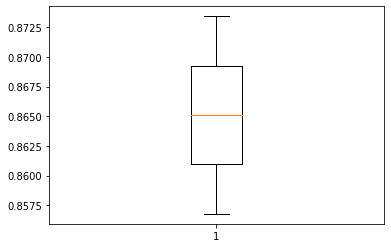

In [63]:
from statistics import mean
from numpy import std
 
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' \
    % (mean(outcomes)*100, std(outcomes)*100, len(outcomes)))
# box and whisker plots of results
plt.boxplot(outcomes)
plt.show()

In [64]:
from statistics import mean
from numpy import std

result = list()

print(f'---------------------------------------------------------')
for i in range(len(histories)):
    result.append(round(mean(histories[i].history['accuracy']), 4))
    print(f'Partition {i+1}: {result[i]*100}_%') 
# [print(f'Acc {i}: {round(mean(histories[i].history['accuracy']), 2)}') for i in range(len(histories))]
print(f'---------------------------------------------------------')
print(f'Average accuracy score: {round(mean(result)*100, 2)}_%')

---------------------------------------------------------
Partition 1: 86.17_%
Partition 2: 88.09_%
---------------------------------------------------------
Average accuracy score: 87.13_%


# PRESENTATION of RESULTS

Partition nº 1


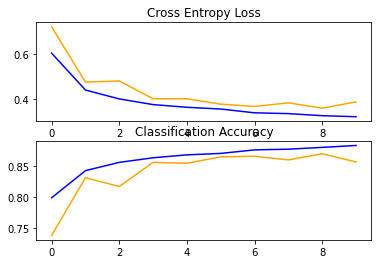

---------------------------------------------------------
Partition nº 2


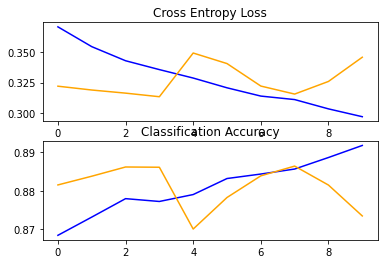

---------------------------------------------------------


In [65]:
# plot diagnostic learning curves
for i in range(len(histories)):
    print(f'Partition nº {i+1}')
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
    print(f'---------------------------------------------------------')

# BUILD the FINAL MODEL

Train the model with all scaled training data.

> * RNN epochs increased by 1000 rounds to improve model's accuracy

In [70]:
import time

t0 = time.time()

In [71]:
# fit model (4 min)
history = model.fit(
                    trainX_norm,
                    trainy,
                    epochs = 10,
                    batch_size = batch_size,
                    verbose = 1,
                    callbacks=[lr_scheduler],
                    use_multiprocessing=True
                    )

Epoch 1/10
1250/1250 [==============================] - 84s 67ms/step - loss: 0.3130 - accuracy: 0.8859 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 83s 66ms/step - loss: 0.3081 - accuracy: 0.8878 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 83s 67ms/step - loss: 0.3068 - accuracy: 0.8870 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 83s 67ms/step - loss: 0.3003 - accuracy: 0.8913 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.3000 - accuracy: 0.8902 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.2963 - accuracy: 0.8915 - lr: 0.0010
Epoch 7/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.2956 - accuracy: 0.8914 - lr: 0.0010
Epoch 8/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.2934 - accuracy: 0.8923 - lr: 0.0010
Epoch 9/10
1250/1250 [==============================] - 85s 68ms

In [72]:
t1 = time.time()
total = t1-t0
print(f'Model needs {round(total/60, 2)} minutes to be trained.')

Model needs 14.09 minutes to be trained.


In [73]:
# Evaluate model
loss, accuracy_score = model.evaluate(testX_norm, testy, verbose=0)
print(f'Loss: {round(loss, 2)}')
print(f'---------------------------------------------------------')
print(f'Accuracy: {round(accuracy_score, 2)*100}_%')
print(f'---------------------------------------------------------')

Loss: 0.38
---------------------------------------------------------
Accuracy: 87.0_%
---------------------------------------------------------


In [74]:
# save model
model.save('final_model_fashion_mnist_final_87.h5')



---



---



# WAREHOUSE


---



In [ ]:
# Save a folder into disk as a ZIP file

import zipfile
import os

# Define the path of the folder to be zipped
folder_path = "/path/to/folder"

# Define the path and filename of the zip archive to be created
zip_path = "/path/to/archive.zip"

# Create a ZipFile object with write permission
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zipf:
    # Walk through the directory tree and add each file to the zip archive
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path)


In [ ]:
# Check if a string is a valid path

import os

# Define the path string to be checked
path_str = "/path/to/file.txt"

# Check if the path string is valid using the os.path module
is_valid_path = os.path.exists(path_str)

# Print the result
if is_valid_path:
    print(f"{path_str} is a valid path.")
else:
    print(f"{path_str} is not a valid path.")


In [ ]:
# Load model
model = load_model('final_model.h5')

In [ ]:
def writeFolderAsZip(folder_path:str, zip_path:str):

    import zipfile
    from os.path import exists

    if(exists(folder_path)) and (exists(zip_path)):
        # Create a ZipFile object with write permission
        with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zipf:
            # Walk through the directory tree and add each file to the zip archive
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    zipf.write(file_path)
    else:
        raise ValueError('ERROR!! >> Wrong path')


In [ ]:
# decompress a ZIP file

import zipfile

# Define the path of the zip file to be decompressed
zip_path = "/path/to/archive.zip"

# Open the zip file in read mode
with zipfile.ZipFile(zip_path, "r") as zipf:
    # Extract all contents of the zip file to a folder with the same name as the zip file
    zipf.extractall(path="/path/to/extract/to")
